In [17]:
import os
import numpy as np
import pandas as pd

In [18]:
%config Completer.use_jedi = False

In [19]:
!nvidia -smi

/bin/bash: line 1: nvidia: command not found


In [20]:
import torch
torch.__version__

'2.2.1+cu121'

In [21]:
from fastai import*
from fastai.vision import*
from fastai.vision.all import*

In [22]:
from google.colab import files

In [46]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

In [47]:
!ls -a ~/.kaggle

.  ..  kaggle.json


In [50]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                           1MB  2024-04-10 09:48:38           7008        140  1.0              
sujithmandala/second-hand-car-price-prediction                   Second Hand Car Price Prediction                      2KB  2024-04-24 12:09:30            917         24  1.0              
aniketmahajan1104/indian-cities-electricity-consumption-2017-19  Indian Cities Electricity Consumption 2017-19         2KB  2024-04-24 09:34:25            578         23  1.0              
mexwell/heart-disease-dataset                          

In [51]:

# Download the dataset from Kaggle
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


100% 2.70G/2.70G [00:36<00:00, 110MB/s]
100% 2.70G/2.70G [00:36<00:00, 79.5MB/s]


In [52]:
!unzip new-plant-diseases-dataset.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plan

In [26]:
data_path='/content/New Plant Diseases Dataset(Augmented)'

In [53]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.55)
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

data = ImageDataLoaders.from_folder(
    data_path,
    item_tfms = tfms_for_item,
    batch_tfms = tfms_for_batch,
    valid_pct=0.2
)


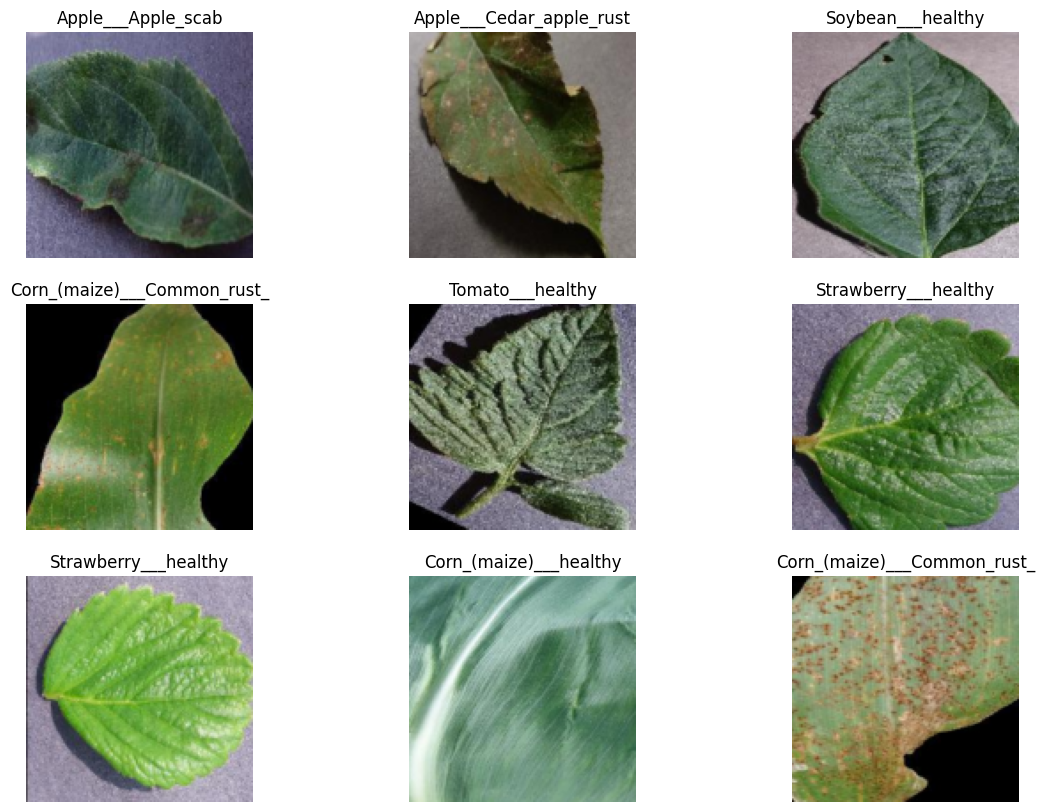

In [54]:
data.show_batch(figsize=(14,10))

In [55]:
print('Number of classes', data.c)
# Output: Number of classes 38

model = cnn_learner(data, resnet34, metrics=[error_rate, accuracy], model_dir = '/tmp/model/')


Number of classes 38


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 126MB/s]


In [60]:
#cox uzun cekir deye
#model.fit_one_cycle(3, 0.0025)

In [57]:
 model.fit_one_cycle(1, 0.0025)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.116043,0.051529,0.017242,0.982758,2:22:19


epoch,train_loss,valid_loss,error_rate,accuracy,time


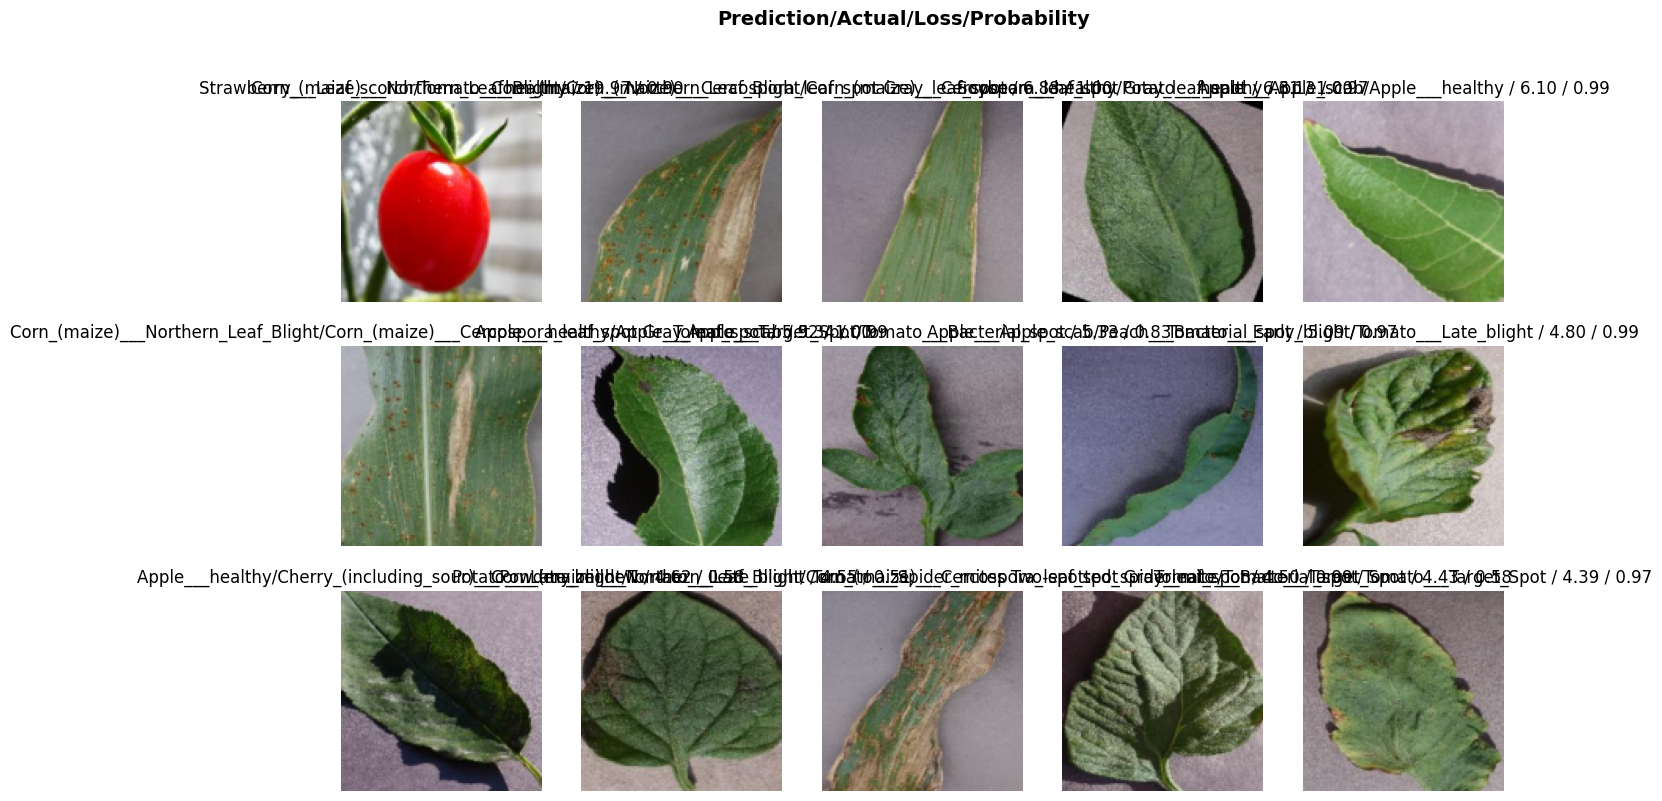

In [59]:
interpretation = Interpretation.from_learner(model)
interpretation.plot_top_losses(k=15)


In [61]:
interp = ClassificationInterpretation.from_learner(model)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


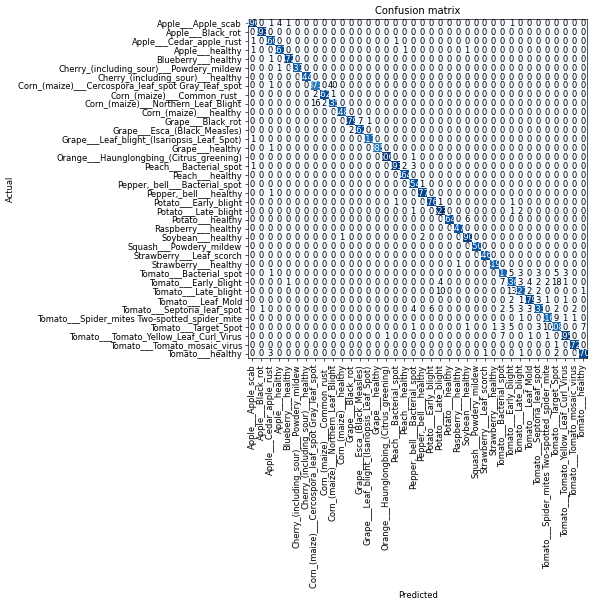

In [62]:
interp.plot_confusion_matrix(figsize=(15,10), dpi=60)
